In [12]:
import os
import random
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
import math
random.seed(datetime.now())
os.chdir('/home/cilegann/Documents/TB')
os.getcwd()

'/home/cilegann/Documents/TB'

In [80]:
database='./data'
dirs=['negative','positive','polluted']

In [81]:
def getGroup(str):
    return str[:str.find("_")]

In [82]:
def getDateStr(str):
    if '/' in str:
        str=str[str.rfind('/'):]
    return str[str.find("_")+1:str.find(".")]

In [83]:
def getDate(str):
    return datetime.strptime(getDateStr(str), "%Y%m%d").date()

# Build info of all samples

In [84]:
samples={}
print("+++ Start building info +++")
for r,ds,fs in os.walk(database):
    for f in fs:
        path=os.path.join(r,f)
        group=getGroup(f)
        if 'txt' not in f and 'jpg' in f:
            if len(group)!=1 and group!='discrete':
                if group not in samples:
                    samples[group]={'files':[],'result':0,'duration':0,'length':0,'type':'sample','firstdate':None}
                samples[group]['files'].append(path)
            else:
                samples[f]={'files':[path],'result':0,'duration':1,'length':1,'type':'discrete','firstdate':None}
                if 'positive' in path:
                    samples[f]['result']=1
                if 'polluted' in path:
                    samples[f]['result']=2
print("+++ Building info done +++")

+++ Start building info +++
+++ Building info done +++


# Sort photos in each sample

In [85]:

print("+++ Start sorting +++")
for k,v in samples.items():
    samples[k]['files']=sorted(samples[k]['files'],key=lambda x:getDateStr(x))
print("+++ Sorting done +++")



+++ Start sorting +++
+++ Sorting done +++


# Complete info of each sample

In [86]:
print("+++ Start computing duration and length +++")
for k,v in (samples.items()):
    if samples[k]['type']=="sample":
        samples[k]['duration']=(getDate(samples[k]['files'][-1])-getDate(samples[k]['files'][0])).days+1
        samples[k]['length']=len(samples[k]['files'])
        samples[k]['firstdate']=getDate(samples[k]['files'][0])
        if 'positive' in samples[k]['files'][-1]:
            samples[k]['result']=1
        if 'polluted' in samples[k]['files'][-1]:
            samples[k]['result']=2
print("+++ Computing duration and length done +++")

+++ Start computing duration and length +++
+++ Computing duration and length done +++


# Build sample for each class

In [87]:
negative={}
d_positive={}
s_positive={}
positive={}
polluted={}
for k,v in (samples.items()):
    if samples[k]['result']==0:
        negative[k]=samples[k]
    elif samples[k]['result']==1:
        if v['type']=='discrete':
            d_positive[k]=samples[k]
        else:
            s_positive[k]=samples[k]
        positive[k]=samples[k]
    elif samples[k]['result']==2:
        polluted[k]=samples[k]

In [88]:
print(len(negative))
print(len(positive))
print(len(d_positive))
print(len(s_positive))
print(len(polluted))

1430
173
94
79
124


# Sample samples for validation

In [98]:
vali_negative_groups=random.sample(set(negative),100)
# vali_positive_groups=random.sample(set(positive),100)
vali_dpositive_groups=random.sample(set(d_positive),21)
vali_spositive_groups=random.sample(set(s_positive),79)
vali_positive_groups=vali_dpositive_groups+vali_spositive_groups
vali_polluted_groups=random.sample(set(polluted),100)
vali_groups=vali_negative_groups+vali_positive_groups+vali_polluted_groups

# Deal with training and jail

In [99]:
train_len_percentile=0.9

In [106]:
train_negative=[]
train_positive=[]
train_polluted=[]
jail_negative=[]
jail_positive=[]
jail_polluted=[]
vali_negative=[]
vali_positive=[]
vali_polluted=[]
for k,v in samples.items():
    if k not in vali_groups:
        for f in v['files']:
            if 'negative' in f:
                train_negative.append(f)
            elif 'positive' in f:
                train_positive.append(f)
            elif 'polluted' in f:
                train_polluted.append(f)
            else:
                print("Type error:",f)
    else:
        vali_file=v['files'][-1]
        if 'negative' in vali_file:
            vali_negative.append(vali_file)
        elif 'positive' in vali_file:
            vali_positive.append(vali_file)
        elif 'polluted' in vali_file:
            vali_polluted.append(vali_file)
        files=v['files'][:-1]
        remainder_len=len(files)
        train_len=math.ceil(remainder_len*train_len_percentile)
        #print("Class",v['result'],"Remain:",remainder_len,"Train:",train_len,"Jail:",remainder_len-train_len,k)
        for i,f in enumerate(files):
            if i<=train_len:
                if 'negative' in f:
                    train_negative.append(f)
                elif 'positive' in f:
                    train_positive.append(f)
                elif 'polluted' in f:
                    train_polluted.append(f)
            else:
                if 'negative' in f:
                    jail_negative.append(f)
                elif 'positive' in f:
                    jail_positive.append(f)
                elif 'polluted' in f:
                    jail_polluted.append(f)

In [107]:
print(len(train_negative),len(jail_negative),len(vali_negative))
print(len(train_positive),len(jail_positive),len(vali_positive))
print(len(train_polluted),len(jail_polluted),len(vali_polluted))

14746 0 100
549 2 100
906 0 100


['./data/positive/170905T0052_20170918.jpg', './data/positive/170111T087_20170119.jpg', './data/positive/170906T0089_20170919.jpg', './data/positive/170110T019_20170124.jpg', './data/positive/170914T0048_20171007.jpg', './data/positive/170721T077_20170905.jpg', './data/positive/180709T0077_20180719.jpg', './data/positive/170516T066_20170713.jpg', './data/positive/p_93.jpg', './data/positive/170706T0058_20170906.jpg', './data/positive/p_38.jpg', './data/positive/170901T0014_20170926.jpg', './data/positive/170906T0085_20170919.jpg', './data/positive/p_11.jpg', './data/positive/170110T070_20170119.jpg', './data/positive/170516T073_20170713.jpg', './data/positive/170905T0038_20170926.jpg', './data/positive/280330T0004_20180508.jpg', './data/positive/270907T0003_20170926.jpg', './data/positive/p_41.jpg', './data/positive/170711T0104_20170906.jpg', './data/positive/170915T0056_20171014.jpg', './data/positive/180713T0038_20180723.jpg', './data/positive/280530T0001_20180612.jpg', './data/posit

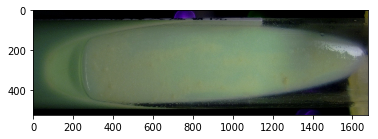

./data/positive/170111T087_20170119.jpg


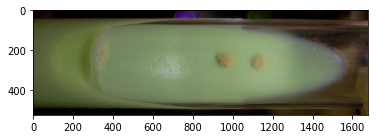

./data/positive/170906T0089_20170919.jpg


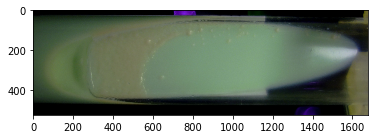

./data/positive/170110T019_20170124.jpg


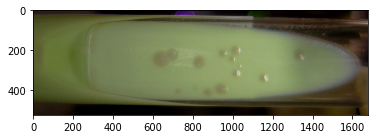

./data/positive/170914T0048_20171007.jpg


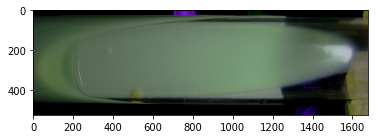

./data/positive/170721T077_20170905.jpg


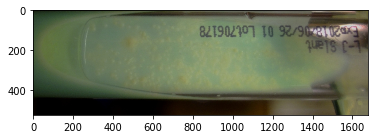

./data/positive/180709T0077_20180719.jpg


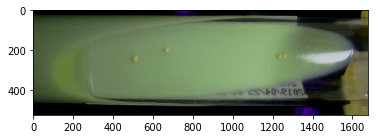

./data/positive/170516T066_20170713.jpg


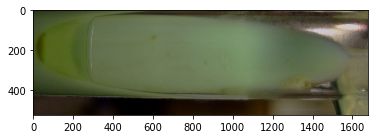

./data/positive/p_93.jpg


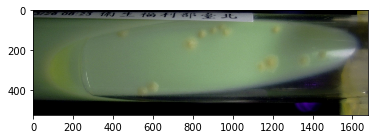

./data/positive/170706T0058_20170906.jpg


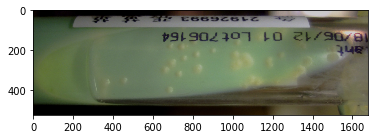

./data/positive/p_38.jpg


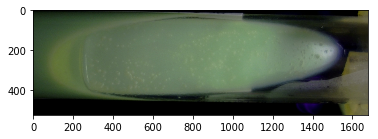

./data/positive/170901T0014_20170926.jpg


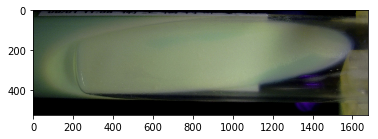

./data/positive/170906T0085_20170919.jpg


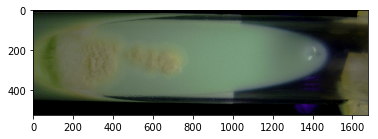

./data/positive/p_11.jpg


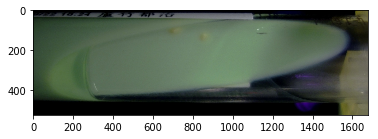

./data/positive/170110T070_20170119.jpg


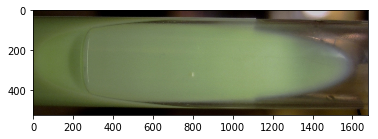

./data/positive/170516T073_20170713.jpg


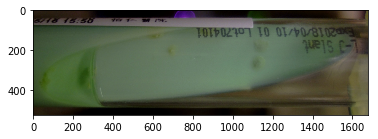

./data/positive/170905T0038_20170926.jpg


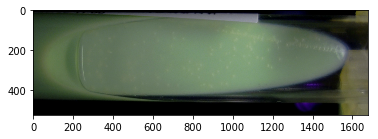

./data/positive/280330T0004_20180508.jpg


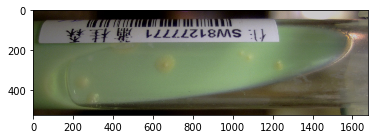

./data/positive/270907T0003_20170926.jpg


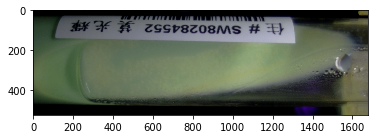

./data/positive/p_41.jpg


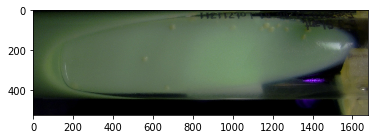

./data/positive/170711T0104_20170906.jpg


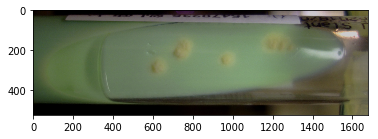

./data/positive/170915T0056_20171014.jpg


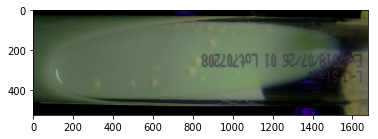

./data/positive/180713T0038_20180723.jpg


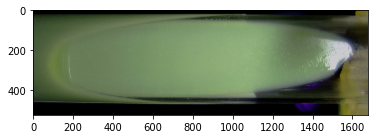

./data/positive/280530T0001_20180612.jpg


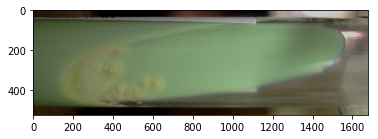

./data/positive/170910T0024_20170926.jpg


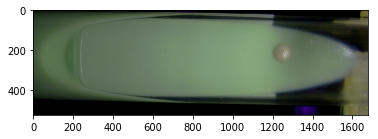

./data/positive/170907T0039_20170926.jpg


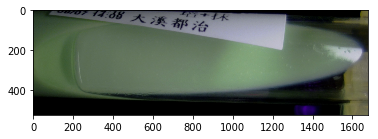

./data/positive/p_12.jpg


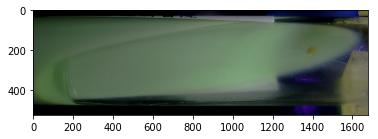

./data/positive/170110T036_20170124.jpg


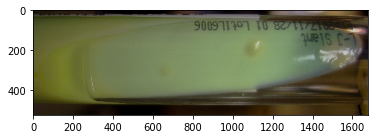

./data/positive/p_57.jpg


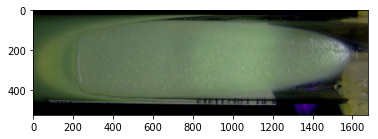

./data/positive/p_1.jpg


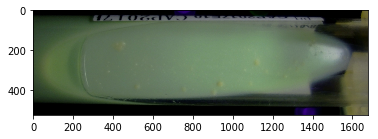

./data/positive/170907T0036_20170919.jpg


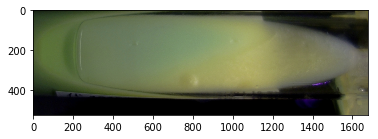

./data/positive/170517T036_20170618.jpg


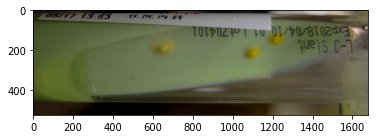

./data/positive/170110T014_20170124.jpg


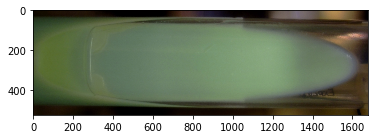

./data/positive/280521T0005_20180607.jpg


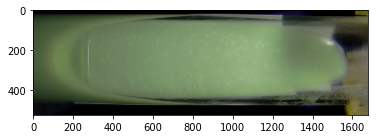

./data/positive/170913T0066_20171014.jpg


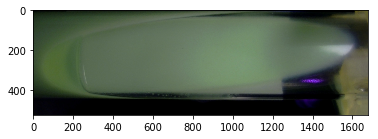

./data/positive/180713T0004_20180723.jpg


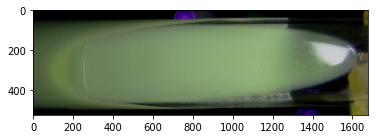

./data/positive/170906T0011_20170919.jpg


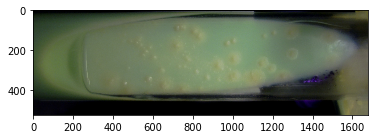

./data/positive/170915T0064_20171014.jpg


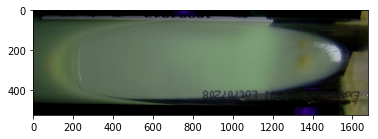

./data/positive/p_16.jpg


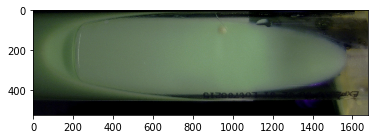

./data/positive/170906T0031_20170926.jpg


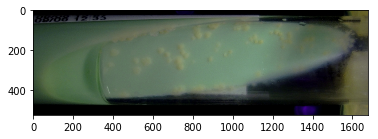

./data/positive/170516T010_20170713.jpg


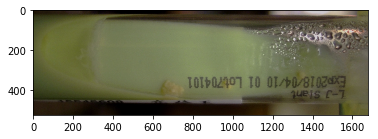

./data/positive/170516T021_20170713.jpg


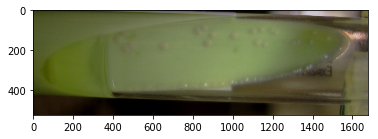

./data/positive/170907T0011_20170926.jpg


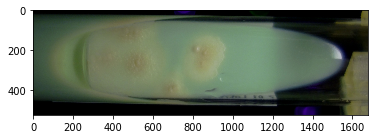

./data/positive/170517T087_20170616.jpg


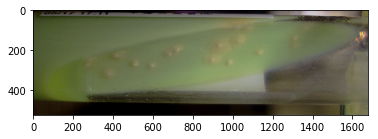

./data/positive/170516T080_20170713.jpg


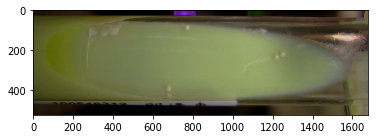

./data/positive/170906T0034_20170919.jpg


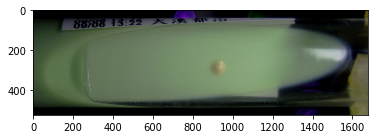

./data/positive/170721T0082_20170905.jpg


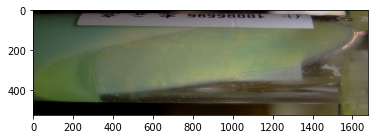

./data/positive/170908T0019_20170919.jpg


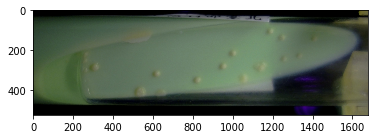

./data/positive/170911T0070_20170926.jpg


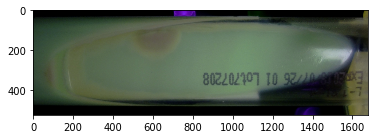

./data/positive/170721T0017_20170905.jpg


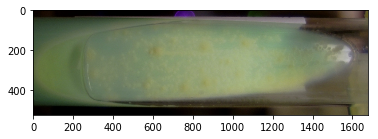

./data/positive/170908T0074_20170926.jpg


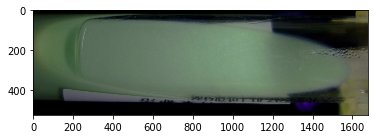

./data/positive/271004T0001_20171114.jpg


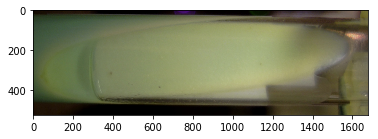

./data/positive/170905T0048_20170926.jpg


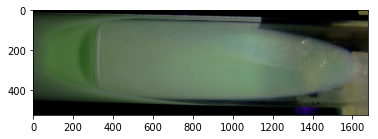

./data/positive/280511T0002_20180530.jpg


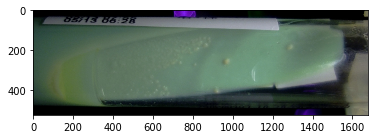

./data/positive/170906T0032_20170919.jpg


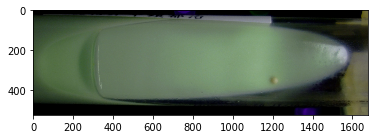

./data/positive/170516T063_20170713.jpg


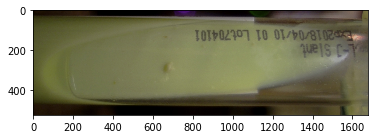

./data/positive/p_33.jpg


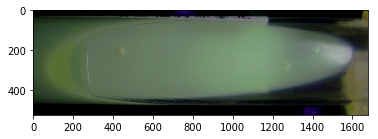

./data/positive/280522T0001_20180622.jpg


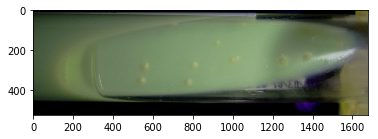

./data/positive/170109T048_20170124.jpg


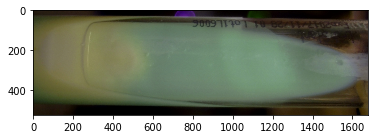

./data/positive/170704T0003_20170906.jpg


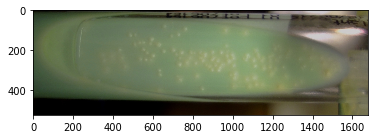

./data/positive/p_20.jpg


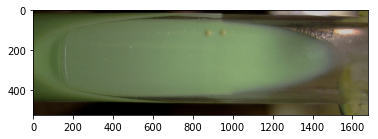

./data/positive/170905T0047_20170926.jpg


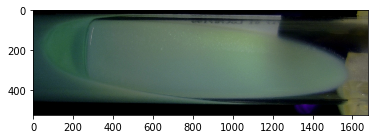

./data/positive/170110T007_20170124.jpg


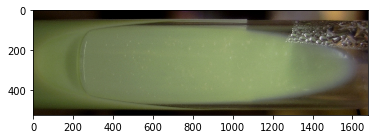

./data/positive/p_23.jpg


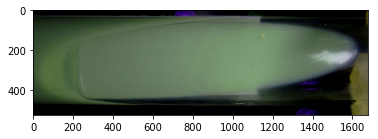

./data/positive/170915T0022_20171014.jpg


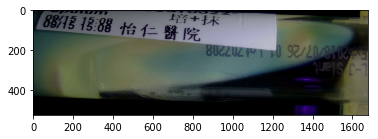

./data/positive/170717T0030_20170905.jpg


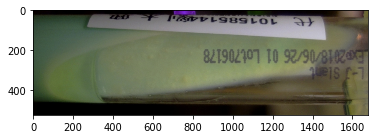

./data/positive/p_27.jpg


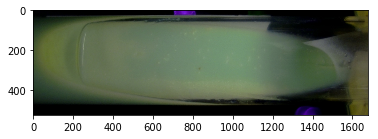

./data/positive/170110T021_20170119.jpg


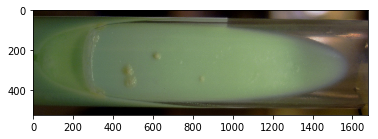

./data/positive/170901T0049_20170926.jpg


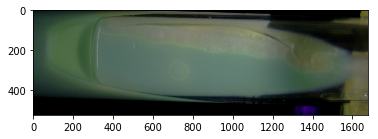

./data/positive/170109T071_20170118.jpg


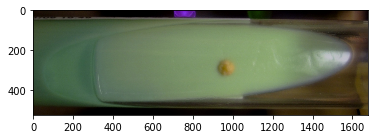

./data/positive/170912T0013_20170927.jpg


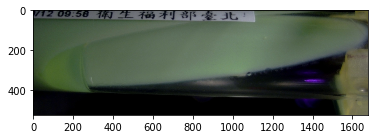

./data/positive/170905T0114_20170926.jpg


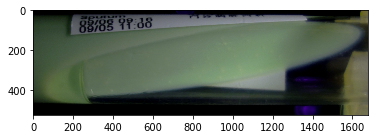

./data/positive/170901T0081_20170926.jpg


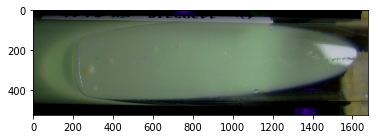

./data/positive/271202T0002_20180114.jpg


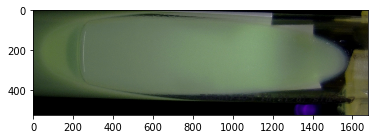

./data/positive/170912T0088_20171007.jpg


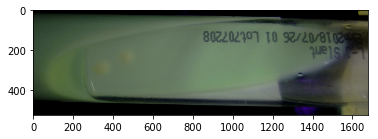

./data/positive/170903T0011_20170926.jpg


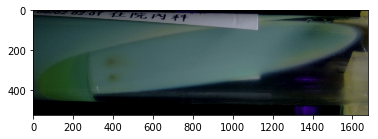

./data/positive/170109T007_20170124.jpg


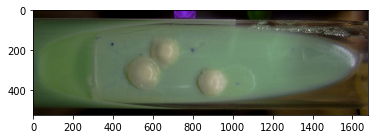

./data/positive/p_104.jpg


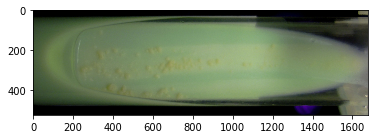

./data/positive/180713M0176_20180723.jpg


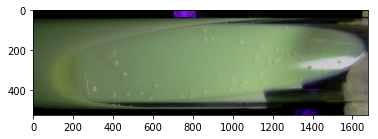

./data/positive/p_94.jpg


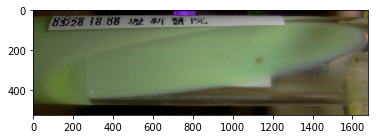

./data/positive/170109T043_20170124.jpg


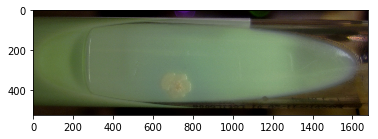

./data/positive/p_105.jpg


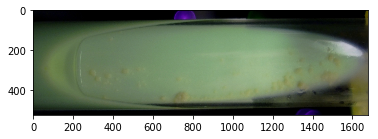

./data/positive/p_59.jpg


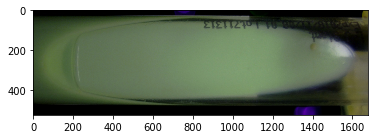

./data/positive/170109T082_20170118.jpg


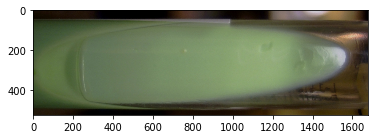

./data/positive/p_28.jpg


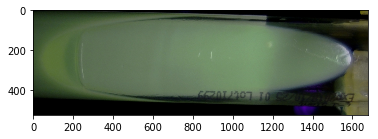

./data/positive/TB21292210_20170728.jpg


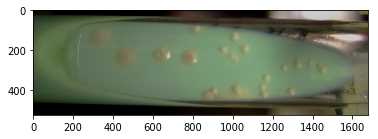

./data/positive/170716T0014_20170906.jpg


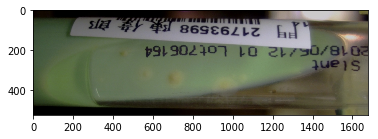

./data/positive/p_77.jpg


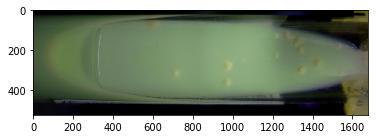

./data/positive/170907T0004_20170926.jpg


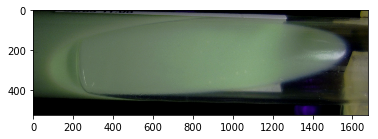

./data/positive/170718T0078_20170905.jpg


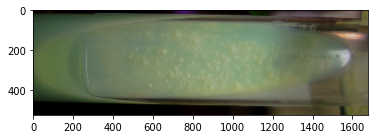

./data/positive/p_72.jpg


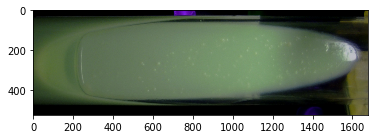

./data/positive/170905T0087_20170918.jpg


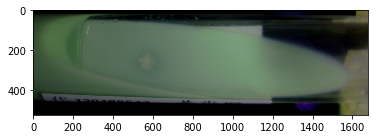

./data/positive/170517T060_20170718.jpg


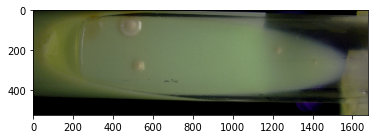

./data/positive/170915T0031_20171014.jpg


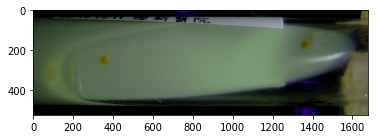

./data/positive/170907T0019_20170926.jpg


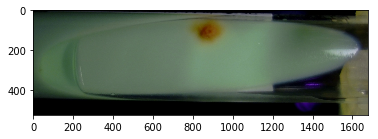

./data/positive/170906T0094_20170926.jpg


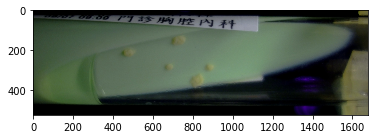

./data/positive/p_90.jpg


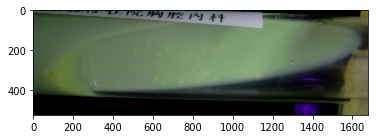

./data/positive/p_17.jpg


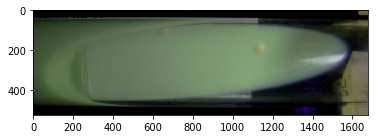

./data/positive/170801H37RV_20170906.jpg


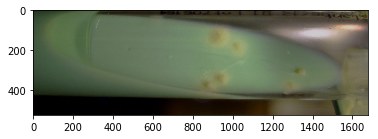

./data/positive/170905T0027_20170926.jpg


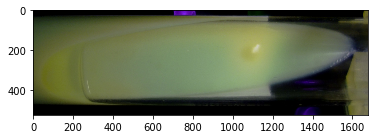

21


In [108]:
print(vali_positive)
p_=0
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
for v in vali_positive:
    print(v)
    plt.imshow(np.asarray(Image.open(v)))
    plt.show()
    if 'p_' in v:
        p_+=1
print(p_)


# Write to mapping file

In [109]:
with open('./mapping/190408_newdata_train_cnn_mapping.csv','w') as file:
    file.write("file_path,label\n")
    for f in train_negative:
        file.write(f+",0\n")
    for f in train_positive:
        file.write(f+",1\n")
    for f in train_polluted:
        file.write(f+",2\n")
with open('./mapping/190408_newdata_train_yolo9000_mapping.csv','w') as file:
    file.write("file_path,label\n")
    for f in train_negative:
        file.write(f+".txt,0\n")
    for f in train_positive:
        file.write(f+".txt,1\n")
    for f in train_polluted:
        file.write(f+".txt,2\n")
with open('./mapping/190408_newdata_vali_cnn_mapping.csv','w') as file:
    file.write("file_path,label\n")
    for f in vali_negative:
        file.write(f+",0\n")
    for f in vali_positive:
        file.write(f+",1\n")
    for f in vali_polluted:
        file.write(f+",2\n")
with open('./mapping/190408_newdata_vali_yolo9000_mapping.csv','w') as file:
    file.write("file_path,label\n")
    for f in vali_negative:
        file.write(f+".txt,0\n")
    for f in vali_positive:
        file.write(f+".txt,1\n")
    for f in vali_polluted:
        file.write(f+".txt,2\n")